In [1]:
# Importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.combine import SMOTETomek

In [2]:
# Reading the given dataset which I have renamed as casestudy.csv

df_sourcefile = pd.read_csv("casestudy.csv")
df_sourcefile.columns

Index(['Age', 'Gender', 'MonthlyIncome', 'Department', 'NumCompaniesWorked',
       'Over18', 'workingfromhome', 'BusinessTravel', 'DistanceFromHome',
       'StandardHours', 'JobSatisfaction', 'complaintfiled',
       'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'Left'],
      dtype='object')

In [3]:
df_sourcefile.head()

,Age,Gender,MonthlyIncome,Department,NumCompaniesWorked,Over18,workingfromhome,BusinessTravel,DistanceFromHome,StandardHours,JobSatisfaction,complaintfiled,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Left
0,31,Female,low,Research & Development,1,Y,0,Travel_Rarely,2,40,4,1,11,1,1,1,0,No
1,32,Male,low,Research & Development,0,Y,0,Travel_Frequently,2,40,4,0,13,2,8,7,3,No
2,34,Female,medium,Research & Development,3,Y,1,Travel_Rarely,8,40,1,0,14,3,7,0,0,No
3,49,Male,high,Research & Development,4,Y,0,Travel_Rarely,1,40,3,0,14,3,23,8,0,No
4,27,Male,medium,Research & Development,1,Y,0,Travel_Rarely,19,40,1,0,11,1,7,7,0,No


In [4]:
# Getting some statistics

df_sourcefile.describe()

,Age,NumCompaniesWorked,workingfromhome,DistanceFromHome,StandardHours,JobSatisfaction,complaintfiled,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.0,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,36.945047,2.695387,0.456581,9.200136,40.0,2.731343,0.199457,15.204885,2.871099,11.291045,7.008820,2.190638
std,9.153312,2.501083,0.498280,8.115843,0.0,1.102861,0.399728,3.656512,1.399134,7.785923,6.120918,3.221768
min,18.000000,0.000000,0.000000,1.000000,40.0,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,0.000000,2.000000,40.0,2.000000,0.000000,12.000000,2.000000,6.000000,3.000000,0.000000
50%,36.000000,2.000000,0.000000,7.000000,40.0,3.000000,0.000000,14.000000,3.000000,10.000000,5.000000,1.000000
75%,43.000000,4.000000,1.000000,14.000000,40.0,4.000000,0.000000,18.000000,4.000000,15.000000,9.000000,3.000000
max,60.000000,9.000000,1.000000,29.000000,40.0,4.000000,1.000000,25.000000,5.000000,40.000000,40.000000,15.000000


In [5]:
# Making a copy

df_hr = df_sourcefile.copy()

In [6]:
# Dropping variables that do not influence outcome variable

df_hr = df_hr.drop(["Over18","StandardHours"], axis = 'columns')


In [7]:
# One hot encoding for all categorical variables
df_hr = pd.get_dummies(df_hr, columns = ['Gender'],drop_first = True)
df_hr = pd.get_dummies(df_hr, columns = ['MonthlyIncome'],drop_first = True)
df_hr = pd.get_dummies(df_hr, columns = ['Department'],drop_first = True)
df_hr = pd.get_dummies(df_hr, columns = ['BusinessTravel'],drop_first = True)
df_hr = pd.get_dummies(df_hr, columns = ['complaintfiled'],drop_first = True)
df_hr = pd.get_dummies(df_hr, columns = ['Left'],drop_first = True)

In [8]:
df_hr = shuffle(df_hr, random_state = 42)

In [9]:
# Checking balance of dataset

df_hr["Left_Yes"].value_counts(normalize = True)

0    0.836499
1    0.163501
Name: Left_Yes, dtype: float64

In [10]:
# Splitting input and output Variables

X = df_hr.drop(["Left_Yes"], axis = 1)
y = df_hr["Left_Yes"]

In [11]:
# Using SMOTETomek to sample to create a balanced dataset
smk = SMOTETomek()
X,y=smk.fit_resample(X,y)
X.shape,y.shape

((2436, 18), (2436,))

In [12]:
# Split out training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y)

In [13]:
# Using Random Forest
clf = RandomForestClassifier(random_state= 42, n_estimators = 500, max_features = 5)
clf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=500, random_state=42)

In [14]:
y_pred_class = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]

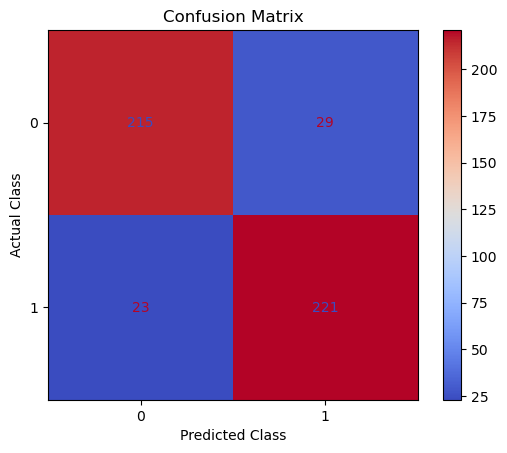

In [16]:
# Creating confusion matrix to understand False Positives and False Negatives

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_class, cmap = "coolwarm")
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()

In [17]:
# Accuracy (the number of correct classifications out of all attempted classifications)

accuracy_score(y_test, y_pred_class)

0.8934426229508197

In [18]:
# Precisions (of all observations that were predicted as positive, how many were actually positive)
# Of all the observations that we predicted that they would leave, how many actually left

precision_score(y_test, y_pred_class)

0.884

In [19]:
# Recall (Of all positive observations, how many did we predict as positives). i.e. of all the people that had left,
# how many did we correctly predicted they would leave.

recall_score(y_test, y_pred_class)

0.9057377049180327

In [20]:
# F1 score (the harmonic mean of precision and recall)

f1_score(y_test, y_pred_class)

0.8947368421052632

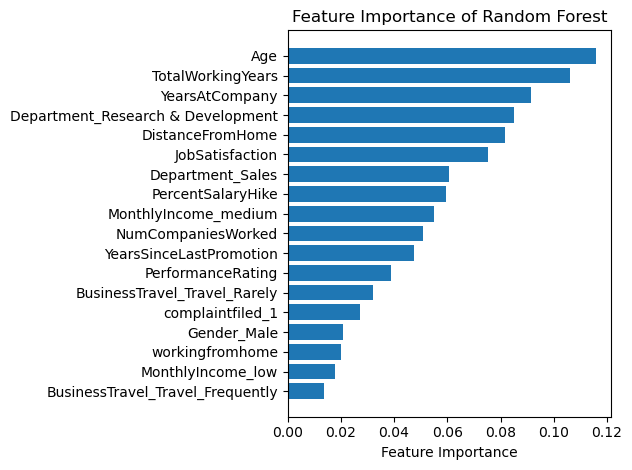

In [21]:
# CLF Feature Importance

feature_importance = pd.DataFrame(clf.feature_importances_)
feature_names = pd.DataFrame(X.columns)
feature_importance_summary = pd.concat([feature_names,feature_importance], axis = 1)
feature_importance_summary.columns = ["input_variable", "feature_importance"]
feature_importance_summary.sort_values(by = "feature_importance", inplace = True)

plt.barh(feature_importance_summary["input_variable"], feature_importance_summary["feature_importance"])
plt.title("Feature Importance of Random Forest")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

In [134]:
import pickle

In [135]:
# Converting model to a pickle file
pickle.dump(clf, open("employee_churn_prediction.p", "wb"))